<a href="https://colab.research.google.com/github/npuneeth/York_Univ_ML/blob/main/Predicting_flight_delays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTING FLIGHT DELAYS** 
## *A SUPERVISED LEARNING APPROACH* 
**CSML-1000 | By GROUP 3** (*Jean-Jacques Rousseau, David Geller, Kwangjin Park, Petr Kocourek and Puneeth Nagarajaiah*)

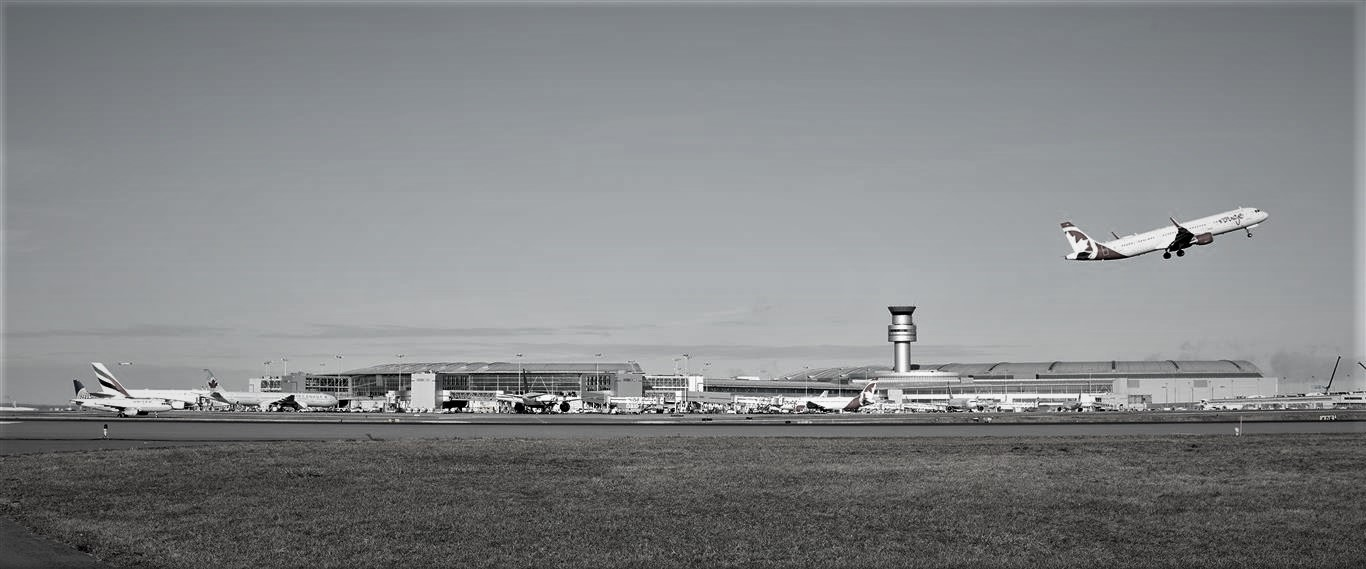

# Table of Contents

1.  Introduction
2.  Basic Installation
3.  Exploratory Data Analysis
4.  Setting up Environment in PyCaret
5.  Comparing All Models
6.  Ensembling Models
7.  Plotting Models
8.  Evaluating Model
9.  Conclusion with Outcomes & Improvements
10. Bibliography

# 1. Introduction

During the summer of 2022, a massive surge in passenger traffic and under-prepared airline staff led to one of the most harrowing travel experiences in recent memory. Hundreds of flights were delayed or cancelled, leaving thousands of travellers stranded. In fact, Toronto's Pearson International Airport (YYZ) was [rated the worst airport in the world](http://www.thestar.com/business/2022/09/22/passengers-rate-pearson-as-one-of-the-worst-airports-in-north-america.html) for delays (57% delays between June 1 and July 27).
It is generally held that the delays were caused by the lack of preparation of airlines for the pent up demand for air travel that followed the easing of travel retrictions associated with the response of governments to the COVID pandemic. Airlines like Air Canada (TSE: AC) lost millions of dollars for rescheduling and compensations. This also resulted in flyer frustration over ruined vacation plans, and in some cases, long legal battles for compensation. 

All this raised questions in our minds. Could we use the power of Machine Learning algorithms to predict whether a flight would be delayed? If we could, it greatly help airlines, passengers, airports and investors. 

This is the motivation for our journey to apply Supervised Machine Learning models to try and predict flight delays.   
 
* **Business Problem:** Using Machine Learning (Binary Classification), predict which flight is likely to be delayed to help airlines plan schedules ahead to avoid bottlenecks at the airports 

* **Dataset:** Airline delay dataset (https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay)

# 2. Basic Installation
### In this section, we install pycaret and the Kaggle dataset.  

We will show:

* **Setting Up Modules:** How to install pycaret, kaggle and other required modules
* **Getting Data:**  How to import data from Kaggle website directly




1. First we will be installing Pycaret for ML data processing. 

In [ ]:
!pip install pycaret==2.3.5

2. Next, we will be installing Kaggle module and make a separate directory called kaggle (if the directory already exists, *mkdir* command won't do anything). 

In [ ]:

! pip install kaggle

We need to create a directory inside ./root (current directory) called .kaggle

In [ ]:
mkdir ~/.kaggle

### Important!! Following this instruction: https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

### We need to download our API token to our desktop PC (or notebook). Then simply upload kaggle.jason to this notebook. 


In [ ]:
cp kaggle.json ~/.kaggle/

3. To download kaggle dataset directly from Kaggle website, we need to have API Credential from the Kaggle account holder. I have used my API Credential for this project. I have already downloaded the credential and stored it inside /MyDrive/. 

Each time this Colab notebook runs, it will grab the credential from the directory, so we can fetch the dataset. 

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

4. Now, we are ready to fetch the dataset from the website and unzip it. 

In [ ]:
! kaggle datasets download jimschacko/airlines-dataset-to-predict-a-delay --force

  0% 0.00/6.15M [00:00<?, ?B/s]
100% 6.15M/6.15M [00:00<00:00, 96.2MB/s]


In [ ]:
! unzip airlines-dataset-to-predict-a-delay.zip

Archive:  airlines-dataset-to-predict-a-delay.zip
  inflating: Airlines.csv            


### Note about the dataset: This dataset is from 2008, so some airlines have since been out of business or have been merged with other airlines

In [ ]:
! pip install pandas
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 3. Exploratory Data Analysis

### In this section, we will port over the raw data and modify it and sample it for better fitting into our machine learning models.

We have done one thing:
1. Exploring basic characteristics of the data
2. Analysis of individual features.
3. Analysis of interaction of selected features with respect to "delay" feature.
4. Make the dataset smaller from 500,000 to 160,000 for faster training
5. Explore basic characteristics of the sample (via Pandas Profiling).  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns; sns.set_theme()

In [ ]:
rawdata = pd.read_csv('/content/Airlines.csv')
df = rawdata.copy()

### There are 9 features in the data set: 4 numeric, 1 binary, and 4 categorical.
### There is 539,383 observations in the data set.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [ ]:
#descriptive statistics of individual features
df.describe()

id         Flight      DayOfWeek           Time  \
count  539383.000000  539383.000000  539383.000000  539383.000000   
mean   269692.000000    2427.928630       3.929668     802.728963   
std    155706.604461    2067.429837       1.914664     278.045911   
min         1.000000       1.000000       1.000000      10.000000   
25%    134846.500000     712.000000       2.000000     565.000000   
50%    269692.000000    1809.000000       4.000000     795.000000   
75%    404537.500000    3745.000000       5.000000    1035.000000   
max    539383.000000    7814.000000       7.000000    1439.000000   

              Length          Delay  
count  539383.000000  539383.000000  
mean      132.202007       0.445442  
std        70.117016       0.497015  
min         0.000000       0.000000  
25%        81.000000       0.000000  
50%       115.000000       0.000000  
75%       162.000000       1.000000  
max       655.000000       1.000000

## Individual Feature Exploration




#### Feature: Airlines
##### The airline with the most flights in the dataset is Southwest Airlines (WN/ SWA), followed by Delta Airlines (DL), and American Airlines (AA). There is a larger variation across the airlines in number of flights.
##### WN also shows the highest percentage of flights delayed (almost 70%). Arizona-based Mesa Airlines (YV) has the lowest percentage (23% of its flights).



There is 18 unique airline companies.


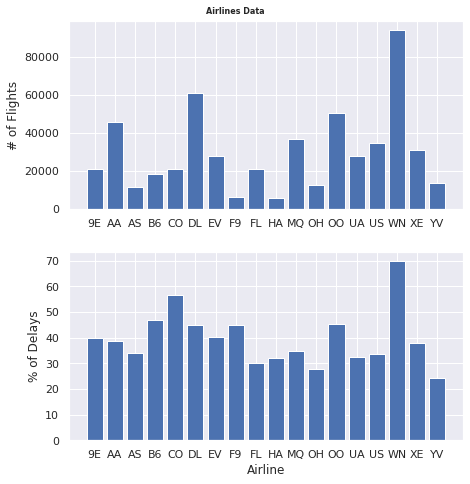

In [ ]:
#how many unique values in 'Airline': 18
Airlines = df.groupby('Airline')['id'].nunique()
Airlines_count = Airlines.count()
Airlines = Airlines.sort_values()
Airlines_d = pd.Series.to_frame(Airlines)
Airlines_d = Airlines_d.sort_values('Airline')

df_a = df.copy
df_a_delay = Airlines = df.groupby('Airline')['Delay'].mean()
df_a_delay = df_a_delay.reset_index()
df_a_delay['Flights Delayed (%)'] = (df_a_delay['Delay'] *100).round(2)
df_a_delay = df_a_delay.sort_values('Delay')
df_a_delay = df_a_delay.drop(columns= 'Delay')
df_a_delay = df_a_delay.sort_values('Airline')


df_airlines = pd.merge(Airlines_d, df_a_delay, on='Airline', how='inner')


x1 = df_airlines['Airline']
y1 = df_airlines['id']

x2 = df_airlines['Airline']
y2 = df_airlines['Flights Delayed (%)']

print("There is " + Airlines_count.astype(str) +  " unique airline companies.")


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,7))
fig.suptitle('Airlines Data',  fontweight="bold", fontsize = 8)
ax1.bar( x1, y1)
#ax1.set_title('# of Number of Flights')
ax2.bar(x2,  y2)
#ax2.set_title('Percentage Flights Delayed per Company')
ax2.set(xlabel='Airline', ylabel = '% of Delays')
ax1.set(ylabel='# of Flights')
fig.tight_layout(pad=2.0)

#### Feature: Flight
##### There is 6585 unique flights with at least 1 flight.
##### On average, a flight number flies approximately 82 times.


In [ ]:
#'Flight': number of a flight
#'Flight': number of a flight
Flight = df.groupby('Flight')['id'].nunique()
Flight_count = Flight.count()
Flight = Flight.sort_values()

print("There is " + Flight_count.astype(str) +  " unique flights with at least 1 flight.")
print("On average, a flight number flies approximately 82 times.")



There is 6585 unique flights with at least 1 flight.
On average, a flight number flies approximately 82 times.


#### Feature: Airport From (starting airport)
##### There is 293 unique starting airports.
##### On the charts below, we can see a large variation among the number of flights across various initial airports (see Chart 1).
##### The percentage of delayed flights (per total flights from the particular airport) is unevenly distributed (see Chart 2).
##### Comparing Chart 1 and Chart 2, we see that the number of flights per starting airport does not corelate with the % of delays.

There is 293 unique starting airports.


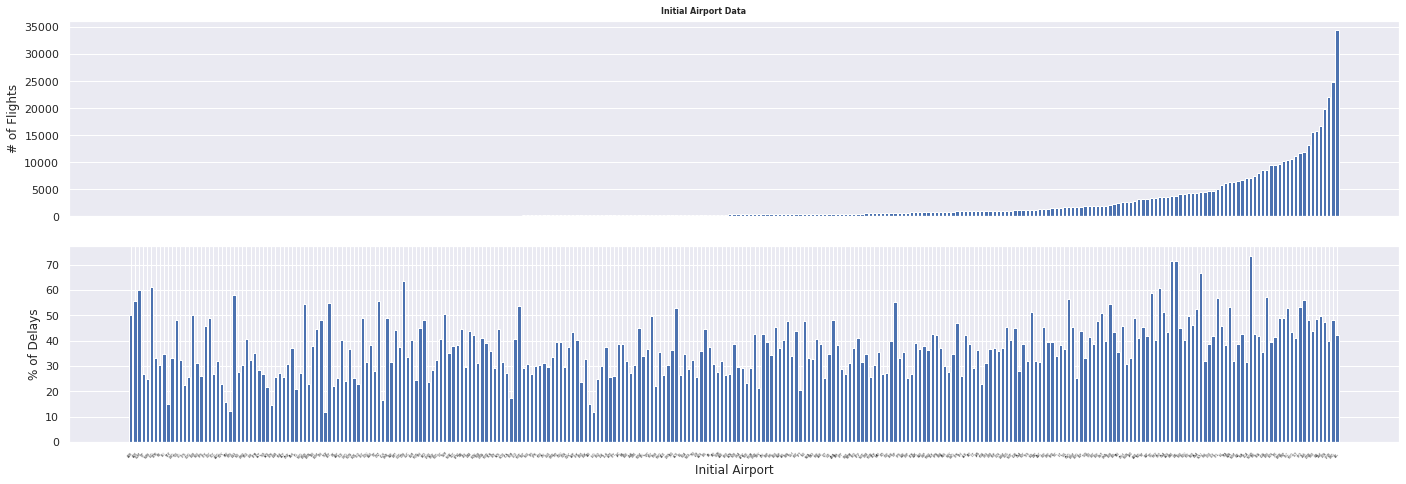

In [ ]:
#Number of unique starting airports ('AirportFrom')
AirportFrom = df.groupby('AirportFrom')['id'].nunique()
AirportFrom_count = AirportFrom.count()
AirportFrom = AirportFrom.sort_values()

print("There is " + AirportFrom_count.astype(str) +  " unique starting airports.")

df_a = df.copy
df_a_delay =  df.groupby('AirportFrom')['Delay'].mean()
df_a_delay = df_a_delay.reset_index()
df_a_delay['Flights Delayed (%)'] = (df_a_delay['Delay'] *100).round(2)
df_a_delay = df_a_delay.sort_values('Delay')
df_a_delay = df_a_delay.drop(columns= 'Delay')
df_a_delay = df_a_delay.sort_values('AirportFrom')

df_airport_from = pd.merge(AirportFrom, df_a_delay, on='AirportFrom', how='inner')

x1 = df_airport_from['AirportFrom']
y1 = df_airport_from['id']

x2 = df_airport_from['AirportFrom']
y2 = df_airport_from['Flights Delayed (%)']


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,7))
fig.suptitle('Initial Airport Data',  fontweight="bold", fontsize = 8)
ax1.bar( x1, y1)
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
ax2.bar(x2,  y2)
ax2.set(xlabel='Initial Airport', ylabel = '% of Delays')
ax1.set(ylabel='# of Flights')

ax2.tick_params(axis='x', rotation=45, labelsize = 3)
#ax2.xticks(fontsize=4, rotation=45)
fig.tight_layout(pad=2.0)

#### Feature: Airport To
##### There is 293 unique landing airports.
##### On the charts below, we can see a large variation among the number of flights across various landing airport as well (chart 1).
##### The percentage of delayed flights (per total flights to the particular airport) is rather unevenly distributed (chart 2). 
##### Comparing chart 1 and chart 2 we see that the number of flights per landing airport does not corelate with the % of delays

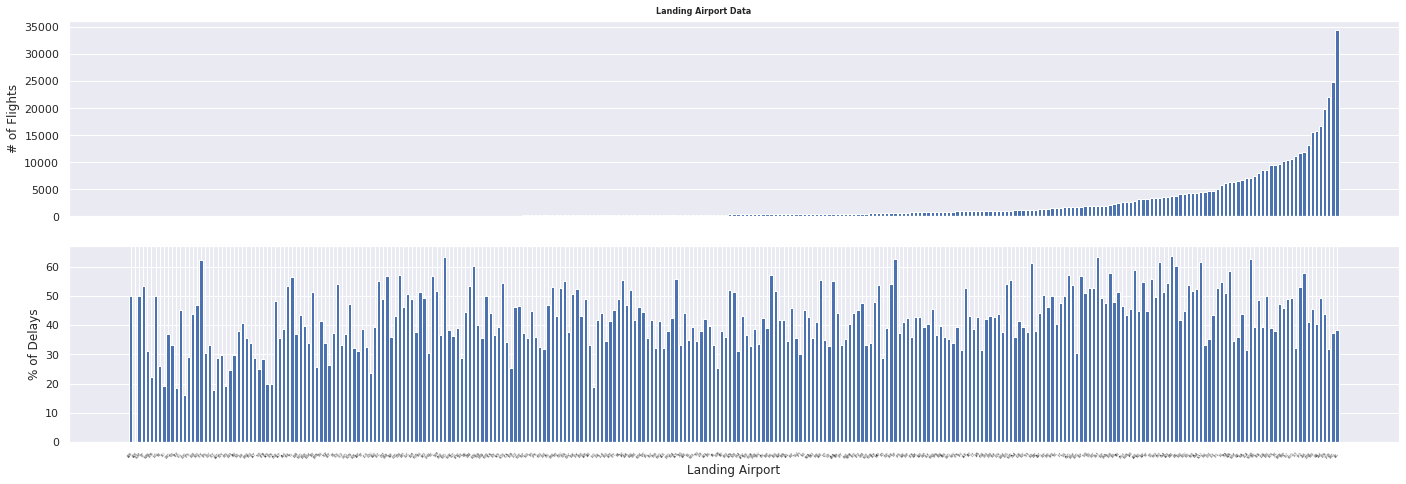

In [ ]:
#'AirportTo
AirportTo = df.groupby('AirportTo')['id'].nunique()
AirportTo_count = AirportTo.count()
AirportTo = AirportTo.sort_values()

df_a = df.copy
df_a_delay =  df.groupby('AirportTo')['Delay'].mean()
df_a_delay = df_a_delay.reset_index()
df_a_delay['Flights Delayed (%)'] = (df_a_delay['Delay'] *100).round(2)
df_a_delay = df_a_delay.sort_values('Delay')
df_a_delay = df_a_delay.drop(columns= 'Delay')
df_a_delay = df_a_delay.sort_values('AirportTo')

df_airport_to = pd.merge(AirportTo, df_a_delay, on='AirportTo', how='inner')

x1 = df_airport_to['AirportTo']
y1 = df_airport_to['id']

x2 = df_airport_to['AirportTo']
y2 = df_airport_to['Flights Delayed (%)']


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,7))
fig.suptitle('Landing Airport Data',  fontweight="bold", fontsize = 8)
ax1.bar( x1, y1)
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
ax2.bar(x2,  y2)
ax2.set(xlabel='Landing Airport', ylabel = '% of Delays')
ax1.set(ylabel='# of Flights')

ax2.tick_params(axis='x', rotation=45, labelsize = 3)
fig.tight_layout(pad=2.0)

#### Feature: Day of Week 
##### There is a slightly higher traffic on Wednesday,Thursday, and Friday. Saturday is the day with the least traffice (chart 1).
##### There a smaller level of delays on Saturday and Friday (chart 2). 

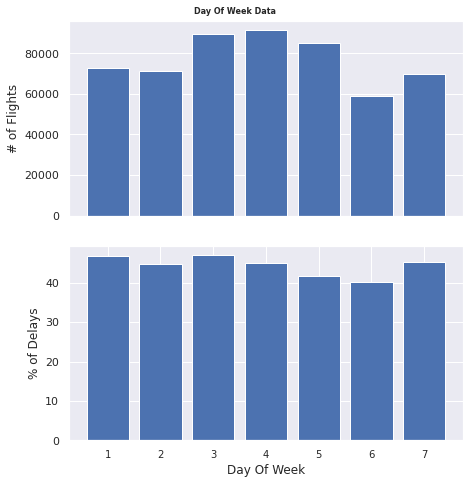

In [ ]:
#Day of Week
DayOfWeek = df.groupby('DayOfWeek')['id'].nunique()

df_a = df.copy
df_a_delay = Airlines = df.groupby('DayOfWeek')['Delay'].mean()
df_a_delay = df_a_delay.reset_index()
df_a_delay['Flights Delayed (%)'] = (df_a_delay['Delay'] *100).round(2)
df_a_delay = df_a_delay.sort_values('Delay')
df_a_delay = df_a_delay.drop(columns= 'Delay')


df_day = pd.merge(DayOfWeek, df_a_delay, on='DayOfWeek', how='inner')

x1 = df_day['DayOfWeek']
y1 = df_day['id']

x2 = df_day['DayOfWeek']
y2 = df_day['Flights Delayed (%)']



fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,7))
fig.suptitle('Day Of Week Data',  fontweight="bold", fontsize = 8)
ax1.bar( x1, y1)
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
ax2.bar(x2,  y2)
ax2.set(xlabel='Day Of Week', ylabel = '% of Delays')
ax1.set(ylabel='# of Flights')

ax2.tick_params(axis='x',  labelsize = 10)
#ax2.xticks(fontsize=4, rotation=45)
fig.tight_layout(pad=2.0)


#### Feature: Time (In a Day)
##### The early day flights between 5am and 7am show the lowest delays (chart 2).  
##### 'Time' = time of a day, time of flight in the day (i.e., hour in minutes)
##### range[0, 1439] with 1439 = 23h59m  (i.e. 11pm 59 min.)

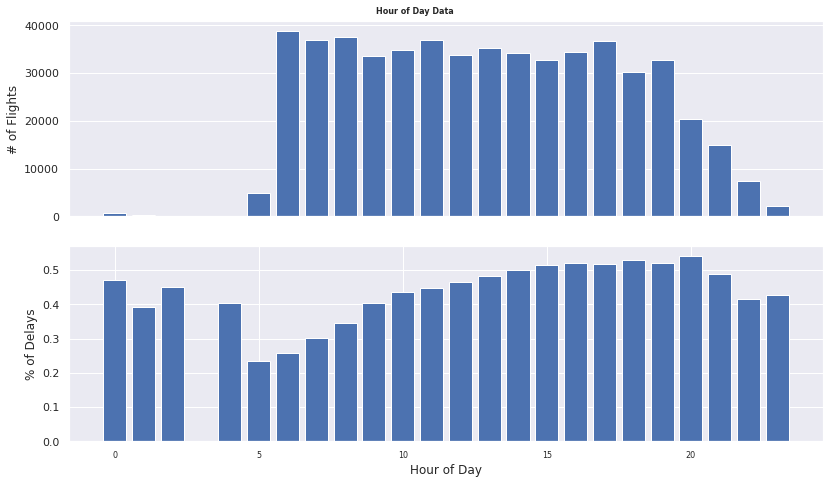

In [ ]:
df_time = df.copy()
df_time['Hour_full'] = df_time['Time']/60
df_time['Hour'] = df_time['Hour_full'].astype(int)
df_time['Minutes'] = (df_time['Hour_full'] - (df_time['Hour'] ) )*60

HourOfDay = df_time.groupby('Hour')['id'].nunique()


df_time1 = df.copy()
df_time1['Hour_full'] = df_time1['Time']/60
df_time1['Hour'] = df_time1['Hour_full'].astype(int)


df_h_delay =  df_time1.groupby('Hour')['Delay'].mean()
df_h_delay = df_h_delay.reset_index()

df_hour = pd.merge(HourOfDay, df_h_delay, on='Hour', how='inner')

x1 = df_hour['Hour']
y1 = df_hour['id']

x2 = df_hour['Hour']
y2 = df_hour['Delay']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,7))
fig.suptitle('Hour of Day Data',  fontweight="bold", fontsize = 8)
ax1.bar( x1, y1)
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
ax2.bar(x2,  y2)
ax2.set(xlabel='Hour of Day', ylabel = '% of Delays')
ax1.set(ylabel='# of Flights')

ax2.tick_params(axis='x',  labelsize = 8)
fig.tight_layout(pad=2.0)

#### Feature: Minute in a Full Hour
##### Distribution of Flights within 60 minutes of full hour

Text(0.5, 1.0, 'Minute of Flight within a Full Hour: from 0 to 59min')

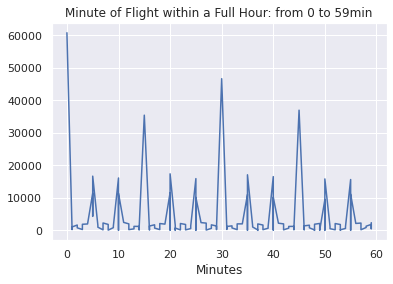

In [ ]:
MinutesInHour = df_time.groupby('Minutes')['id'].nunique()
ax_m = MinutesInHour.plot()
ax_m.set_title('Minute of Flight within a Full Hour: from 0 to 59min')

#### Feature: Length of the Flight
##### Majority of flights has fly time between 1 hour and 6 hours. There is only a minimum flights longer than 6 hours. (green line, LHS axis). 
##### There is a lightly increasing probability of a delay with increasing fly time (red line, RHS axis)).

##### Here, we can see that most flight leave between 6AM and 7PM (19th hour). Also most delays occur on all time slots except for between 5AM and 8AM.

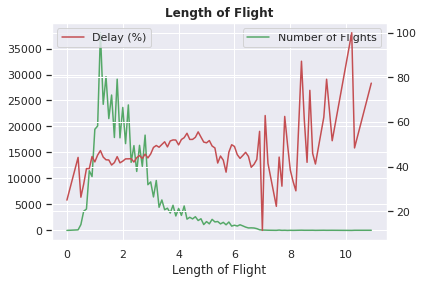

In [ ]:
#'Length'
df_l = df.copy()
df_l['Length_hour'] = df_l['Length']/60
df_l['Length_hour'] = df_l['Length_hour'].round(1)
df_l_group = df_l.groupby('Length_hour')['id'].nunique()

df_time_l = df.copy()
df_time_l['Length_hour'] = df_time_l['Length']/60
df_time_l['Length_hour'] = df_time_l['Length_hour'].round(1)

df_l_delay = df_time_l.groupby('Length_hour')['Delay'].mean()
df_l_delay = df_l_delay * 100


df_hour = pd.merge(df_l_group, df_l_delay, on='Length_hour', how='inner')
df_hour['Length_hour'] = df_hour.index

x = df_hour['Length_hour']
#x1 = df_hour['Length_hour']
y1 = df_hour['id']
#x2 = df_hour['Length_hour']
y2 = df_hour['Delay']

fig1, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, label='Number of Flights', c='g')
ax2.plot(x, y2, label='Delay (%)', c='r')


fig.suptitle('Length of Flight Data',  fontweight="bold", fontsize = 8)
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(True)
plt.title('Length of Flight', fontweight="bold", fontsize = 12)
ax1.set(xlabel='Length of Flight')
ax1.legend()
ax2.legend()

#### Feature:  Delay (overall)
##### 44.54% of flights is delayed 

In [ ]:
#'Delay'
delay_pct = round(df_time['Delay'].sum()/df_time['Delay'].count() * 100 , 2)
delay_pct_w = delay_pct.astype(str)
print(delay_pct_w +  '% of flights is delayed')

44.54% of flights is delayed


### Delays Probability per Features (Interaction of Features)
##### Overall, we see a low correlation between the Delay feature and the other quantitative features. The highest correlation is between Delay and Time (i.e., time of a day)

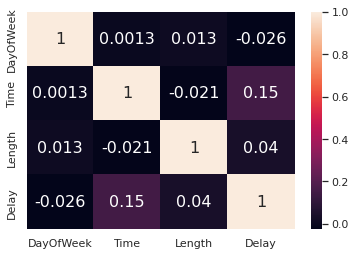

In [ ]:
#correlation matrix

df_mat = df.drop(['id', 'Flight'], axis = 1)
corrMatrix = df_mat.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 16})

### Day of Week vs. Airline 
#### At this chart, we see different companies struggling with delays in different day of week.
#### For example, passengers of Delta Airplines (DL) are more likely to experience delays on a Monday than on a Saturday.

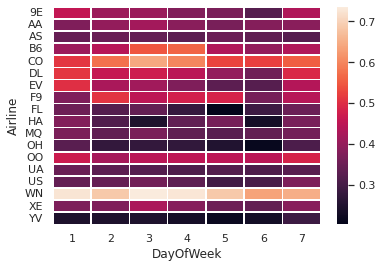

In [ ]:
table = pd.pivot_table(df, values = 'Delay',  index=['Airline'], columns=['DayOfWeek'], aggfunc=np.mean)
ax = sns.heatmap(table, linewidths=.5)

#### Airline vs. Hour of Day
##### This charts compares delays by companies and hour of day.
##### In general, there are fewer delays in the morning.

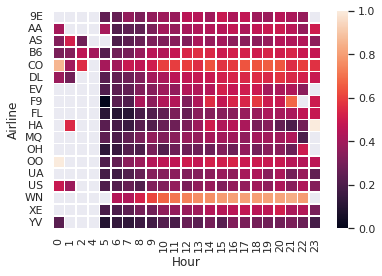

In [ ]:
df_time = df.copy()
df_time['Hour_full'] = df_time['Time']/60
df_time['Hour'] = df_time['Hour_full'].astype(int)
df_time['Minutes'] = (df_time['Hour_full'] - (df_time['Hour'] ) )*60

table_a = pd.pivot_table(df_time, values = 'Delay',  index=['Airline'], columns=['Hour'], aggfunc=np.mean)
ax = sns.heatmap(table_a, linewidths=.5)

### Airline vs. Length of Flight (in hours)
#### The comparison of airlines vs. length of flight in hours. 
#### In general, companies have more problems with longer flights. The exception is F9

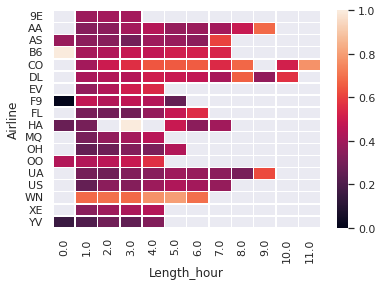

In [ ]:
df_time_l = df.copy()
df_time_l['Length_hour'] = df_time_l['Length']/60
df_time_l['Length_hour'] = df_time_l['Length_hour'].round(0)

table_l = pd.pivot_table(df_time_l, values = 'Delay',  index=['Airline'], columns=['Length_hour'], aggfunc=np.mean)
ax = sns.heatmap(table_l, linewidths=.5)

### Day of Week vs. Hour of Day
##### This charts distribution of delays per hour broken down per day of week.
##### Interestingly, Friday at 10pm seems to be an exceptional moment with low delay when compared with other days and times during afternoon/evening.

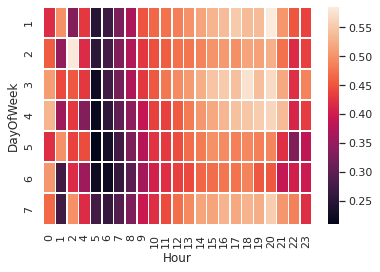

In [ ]:
df_time = df.copy()
df_time['Hour_full'] = df_time['Time']/60
df_time['Hour'] = df_time['Hour_full'].astype(int)
df_time['Minutes'] = (df_time['Hour_full'] - (df_time['Hour'] ) )*60

table_h = pd.pivot_table(df_time, values = 'Delay',  index=['DayOfWeek'], columns=['Hour'], aggfunc=np.mean)
ax = sns.heatmap(table_h, linewidths=.5)


### Panda Profiling
#### Used to gain initial understanding of the sample.

### We are now going to use the pandas profiling function to generate a profile report on our dataset for data visualization and analysis.

Based on Pandas analysis we can deduce following details about our dataset:

1. Dataset has no missing data or duplicate rows
2. Time column is the departure time measured in minutes from midnight 
3. Length column is the duration of the flight in minutes 
4. Flight and Length shows negative correlation
5. Time and Delay shows positive correlation (What we are interested in)
6. Airline and Length shows positive correlation


In [ ]:
import pandas as pd
import pandas_profiling as pp 

In [ ]:
dataset = rawdata.sample(n=16143)

In [ ]:
# The sample size
dataset.shape

(16143, 9)

In [ ]:
profile = pp.ProfileReport(dataset) 
profile.to_file("output.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Data split


### Now we have a working dataset for our ML training. We can now split the dataset for training, validation and testing.

In [ ]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (15336, 9)
Unseen Data For Predictions: (807, 9)


# 4. Setting up Environment in PyCaret

* **Setting Up our dataset pipeline:** We will be using `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

In [ ]:
dataset = pd.read_csv('/content/Airlines.csv')
dataset.drop("id", axis=1, inplace=True)
dataset = dataset.sample(n=16143)
dataset.shape

(16143, 8)

In [ ]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (15336, 8)
Unseen Data For Predictions: (807, 8)


In [ ]:
! pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.classification import *

1. We are going to set up our ML environment and customize it by pre-processing pipeline using different parameteres.  

In [ ]:
exp_clf101 = setup(data = data, target = 'Delay', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  log_experiment = False, experiment_name = 'airlinedelays', use_gpu=True) 

Description            Value
0                               session_id              123
1                                   Target            Delay
2                              Target Type           Binary
3                            Label Encoded             None
4                            Original Data       (15336, 8)
5                           Missing Values            False
6                         Numeric Features                3
7                     Categorical Features                4
8                         Ordinal Features            False
9                High Cardinality Features            False
10                 High Cardinality Method             None
11                   Transformed Train Set     (10735, 266)
12                    Transformed Test Set      (4601, 266)
13                      Shuffle Train-Test             True
14                     Stratify Train-Test            False
15                          Fold Generator  StratifiedKFold
16                             Fold Number               10
17                                CPU Jobs               -1
18                                 Use GPU             True
19                          Log Experiment            False
20                         Experiment Name    airlinedelays
21                                     USI             3cc2
22                         Imputation Type           simple
23          Iterative Imputation Iteration             None
24                         Numeric Imputer             mean
25      Iterative Imputation Numeric Model             None
26                     Categorical Imputer         constant
27  Iterative Imputation Categorical Model             None
28           Unknown Categoricals Handling   least_frequent
29                               Normalize             True
30                        Normalize Method           zscore
31                          Transformation             True
32                   Transformation Method      yeo-johnson
33                                     PCA            False
34                              PCA Method             None
35                          PCA Components             None
36                     Ignore Low Variance             True
37                     Combine Rare Levels            False
38                    Rare Level Threshold             None
39                         Numeric Binning            False
40                         Remove Outliers            False
41                      Outliers Threshold             None
42                Remove Multicollinearity             True
43             Multicollinearity Threshold             0.95
44             Remove Perfect Collinearity             True
45                              Clustering            False
46                    Clustering Iteration             None
47                     Polynomial Features            False
48                       Polynomial Degree             None
49                    Trignometry Features            False
50                    Polynomial Threshold             None
51                          Group Features            False
52                       Feature Selection            False
53                Feature Selection Method          classic
54            Features Selection Threshold             None
55                     Feature Interaction            False
56                           Feature Ratio            False
57                   Interaction Threshold             None
58                           Fix Imbalance            False
59                    Fix Imbalance Method            SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Delay',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='Delay')),
                ('fix_perfect', Remove_100(target='Delay')),
                ('clean_names', Clean_Colum_Names()),
       

A few important things to note regarding the dataset:
- **Target Type :**  Target type for this dataset is binary (1 or 0)<br/>
<br/>
- **Original Data :**  Displays the original shape of the dataset. In this experiment (512414, 9) means 512414 samples and 9 features including the target column. <br/>
<br/>


# 5. Comparing All Models

Candidates for our model are as follows:

1. Random Forest ('rf')
Pro: robust to outliers, works well with non-linear data, lower risk of overfitting, runs well with large dataset, better accuracy than other classification algorithms
Con: found to be biased with dealing with categorical variables, slow training

2. Logistic regression ('lr')
Pro:fast at clasifying unkown records, good accuracy for many simple data sets
Con: assumes linearity between dependent variables and independent variables, non-linear problems can't be solved with logistic regression, Neural Network can outperform this algorithm

3. Linear Discriminant Analysis ('lda')
Pro: Could be better alternative to logistic regression, simple and fast
Con: requires normal distribution assumption on features

4. Ada Boost Classifier ('ada')
Pro: requires less parameter tweaking than SVM, no overfitting, improved accuracy
Con: sensitive to noises

### We ran compare_models() on Ada Boost and LDA only because of limitation of RAM for Colab. 

In [ ]:
best_model = compare_models(include = ['rf','lr', 'ada', 'lda'], fold=8)

Model  Accuracy     AUC  Recall   Prec.      F1  \
ada          Ada Boost Classifier    0.6358  0.6741  0.4783  0.6242  0.5414   
lda  Linear Discriminant Analysis    0.6349  0.6766  0.5008  0.6163  0.5525   
lr            Logistic Regression    0.6339  0.6782  0.4998  0.6148  0.5513   
rf       Random Forest Classifier    0.6200  0.6558  0.4952  0.5931  0.5395   

      Kappa     MCC  TT (Sec)  
ada  0.2481  0.2542    1.2000  
lda  0.2497  0.2537    0.6962  
lr   0.2476  0.2515    0.9775  
rf   0.2206  0.2233    6.3275

INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 2
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)


### We deliberately reduced number of folds to avoid RAM crash issues. Also, based on our experiment, simply increasing the fold to the maximum number does not improve model's accuracy. Here, we can see that the best model with highest accuracy is Linear Discriminant Analysis.

# 6. Ensembling Models
Ensemble methods are techniques that create multiple models and then combine them to produce improved results. Ensemble methods usually produces more accurate solutions than a single model would. We are going to try a number of different techniques to find the model with highest accuracy. 

### Bagging and boosting
Bagging is used with decision trees, where it significantly raises the stability of models in improving accuracy and reducing variance, which eliminates the challenge of overfitting.

Boosting combines a set of weak learners into a strong learner to minimize training errors. In boosting, a random sample of data is selected, fitted with a model and then trained sequentially — that is, each model tries to compensate for the weaknesses of its predecessor. With each iteration, the weak rules from each individual classifier are combined to form one, strong prediction rule. 

To use Ensembling, we need to use models like decision trees that can benefit from bagging and boosting. 

In [ ]:
dt = create_model('dt', fold=5)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5650  0.5594  0.5010  0.5171  0.5089  0.1186  0.1187
1       0.5869  0.5825  0.5435  0.5407  0.5421  0.1658  0.1658
2       0.5724  0.5685  0.5248  0.5248  0.5248  0.1362  0.1362
3       0.5631  0.5599  0.5197  0.5143  0.5170  0.1182  0.1182
4       0.5594  0.5558  0.5166  0.5102  0.5134  0.1108  0.1109
Mean    0.5694  0.5652  0.5211  0.5214  0.5212  0.1299  0.1299
SD      0.0097  0.0096  0.0137  0.0107  0.0116  0.0198  0.0197

INFO:logs:create_model_container: 5
INFO:logs:master_model_container: 5
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
bagged_dt = ensemble_model(dt, n_estimators=10, fold=5)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5966  0.6244  0.4669  0.5623  0.5102  0.1723  0.1745
1       0.5897  0.6127  0.4451  0.5548  0.4940  0.1558  0.1585
2       0.6157  0.6451  0.4451  0.5981  0.5104  0.2052  0.2113
3       0.6064  0.6311  0.4658  0.5777  0.5158  0.1906  0.1938
4       0.6046  0.6300  0.4576  0.5763  0.5101  0.1859  0.1893
Mean    0.6026  0.6287  0.4561  0.5738  0.5081  0.1820  0.1855
SD      0.0089  0.0105  0.0095  0.0148  0.0074  0.0168  0.0179

INFO:logs:create_model_container: 6
INFO:logs:master_model_container: 6
INFO:logs:display_container: 4
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                        

In [ ]:
boosted_dt = ensemble_model(dt, method = 'Boosting', fold=5)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5724  0.5909  0.4969  0.5263  0.5112  0.1318  0.1319
1       0.5827  0.5875  0.4327  0.5457  0.4827  0.1407  0.1434
2       0.5757  0.5834  0.5290  0.5284  0.5287  0.1429  0.1429
3       0.5766  0.5920  0.5145  0.5304  0.5223  0.1423  0.1424
4       0.5585  0.5909  0.5611  0.5084  0.5335  0.1163  0.1168
Mean    0.5732  0.5889  0.5068  0.5279  0.5157  0.1348  0.1355
SD      0.0081  0.0032  0.0426  0.0119  0.0181  0.0101  0.0103

INFO:logs:create_model_container: 7
INFO:logs:master_model_container: 7
INFO:logs:display_container: 5
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction

### Between bagging and boosting, it seems that 'bagging' produces better accuracy. Based on comparision between all ensembled models, Linear Discriminant Classifier has the highest accuracy, so we will plot our model with Linear Discriminant Classifier. 

# 7. Plotting Models

* **ROC Curve:**
Receiver Operating Characterstic curve shows the True Positive Rate (Recall) and False Positive rate

* **AUC:**
Area under ROC Curve measures 2D area underneath ROC curve from (0,0) to (1,1). AUC ranges from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; if predictions are 100% correct AUC will be 1.0.

* **Precision-Recall Curve:**
The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

* **Feature Importance Plot:**
Provides a list of the most significant variables in descending order

* **Confusion matrix:**
Is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.Confusion matrices are useful because they give direct comparisons of values like True Positives, False Positives, True Negatives and False Negatives.

In [ ]:
lda = create_model('lda', fold=8)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6461  0.6814  0.5017  0.6352  0.5606  0.2711  0.2764
1       0.6349  0.6896  0.5033  0.6154  0.5537  0.2500  0.2536
2       0.6125  0.6505  0.4868  0.5833  0.5307  0.2053  0.2077
3       0.6334  0.6832  0.5083  0.6116  0.5552  0.2479  0.2509
4       0.6408  0.6912  0.4901  0.6298  0.5512  0.2595  0.2652
5       0.6446  0.6745  0.5033  0.6320  0.5604  0.2684  0.2733
6       0.6326  0.6709  0.4942  0.6132  0.5473  0.2442  0.2482
7       0.6346  0.6715  0.5191  0.6101  0.5609  0.2515  0.2539
Mean    0.6349  0.6766  0.5008  0.6163  0.5525  0.2497  0.2537
SD      0.0098  0.0122  0.0097  0.0156  0.0094  0.0191  0.0199

INFO:logs:create_model_container: 8
INFO:logs:master_model_container: 8
INFO:logs:display_container: 6
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_lda = tune_model(lda, fold=8)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6490  0.6817  0.5050  0.6394  0.5643  0.2772  0.2826
1       0.6371  0.6928  0.5066  0.6182  0.5569  0.2547  0.2583
2       0.6088  0.6527  0.4785  0.5792  0.5240  0.1970  0.1996
3       0.6341  0.6847  0.5083  0.6128  0.5557  0.2493  0.2524
4       0.6386  0.6913  0.4868  0.6269  0.5480  0.2548  0.2605
5       0.6408  0.6769  0.4950  0.6282  0.5537  0.2602  0.2654
6       0.6341  0.6716  0.4925  0.6162  0.5475  0.2468  0.2511
7       0.6346  0.6727  0.5108  0.6123  0.5570  0.2503  0.2533
Mean    0.6347  0.6780  0.4979  0.6166  0.5509  0.2488  0.2529
SD      0.0108  0.0121  0.0108  0.0166  0.0113  0.0215  0.0223

INFO:logs:create_model_container: 9
INFO:logs:master_model_container: 9
INFO:logs:display_container: 7
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


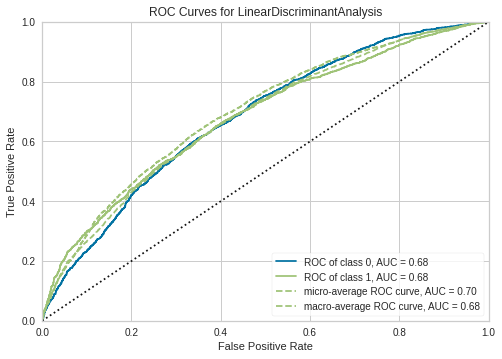

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lda, plot = 'auc')

* **AUC Analysis:** AUC is 0.70 and the ROC curve falls closer to True Positive rate, which shows it has a fairly good accuracy of prediction.

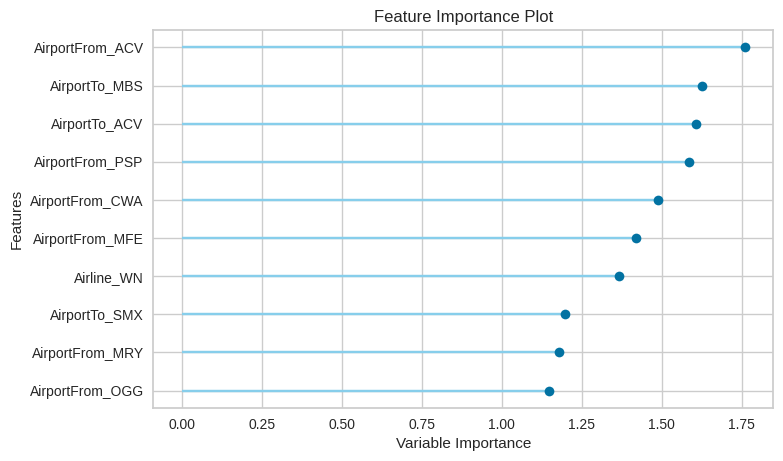

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lda, plot ='feature')

* **Feature Analysis:**  Based on the Feature Importance plot, Origin Airport Humboldt County in California(ACV), Destination Airport MBS in Michigan (MBS) and Destination Airport Humboldt County (ACV) are the top three most relevant features that seem to affect our model the most 

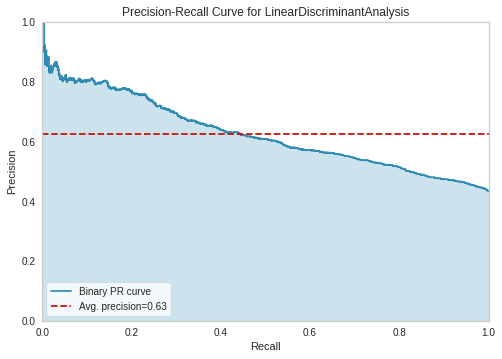

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lda, plot = 'pr')

* **Precision-Recall Analysis:** Average Precision is 0.63, which is also fairly good.

> Indented block




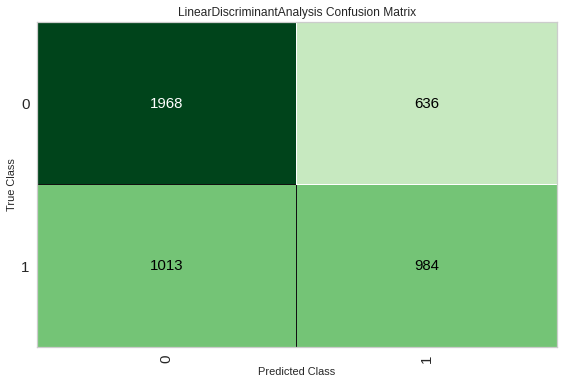

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lda, plot='confusion_matrix')

* **Confusion Matrix Analysis:** We can see that our model has fairly good prediciton for true positives and true negative classes, but also has a large set of false positives and false negatives. 

### Our model unfortunately has a large number of false negatives, which means it predicted that a flight will not be delayed, when in fact, it was delayed. 

# 8. Evaluating Our Model

Now we have our final model, we will try unseen dataset on our model and evaluate its prediction accuracy.

In [ ]:
evaluate_model(tuned_lda)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001), fold=None, fit_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lda)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001), probability_threshold=None, encoded_labels=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1  \
0  Linear Discriminant Analysis    0.6416  0.6794  0.4927  0.6074  0.5441   

    Kappa     MCC  
0  0.2541  0.2579

Flight      Time    Length  Airline_9E  Airline_AA  Airline_AS  \
0    -0.657174  0.272167  0.085886         0.0         0.0         0.0   
1     1.727548  0.382053 -2.302542         0.0         0.0         0.0   
2    -0.344710  1.853988  0.731670         0.0         0.0         0.0   
3    -1.314781  1.727799  0.497645         0.0         0.0         0.0   
4     1.049322 -0.799526  0.483365         1.0         0.0         0.0   
...        ...       ...       ...         ...         ...         ...   
4596  0.935051 -0.085903 -1.722196         0.0         0.0         0.0   
4597 -1.329331 -0.688660 -2.161134         0.0         0.0         0.0   
4598  0.490119  0.058046  0.347399         0.0         0.0         0.0   
4599  1.271023 -0.176358 -1.593519         0.0         0.0         0.0   
4600  1.293555 -1.396039 -0.379522         0.0         0.0         0.0   

      Airline_B6  Airline_CO  Airline_DL  Airline_EV  ...  DayOfWeek_1  \
0            0.0         0.0         0.0         0.0  ...          0.0   
1            0.0         0.0         0.0         0.0  ...          0.0   
2            0.0         0.0         0.0         0.0  ...          0.0   
3            0.0         0.0         0.0         0.0  ...          0.0   
4            0.0         0.0         0.0         0.0  ...          0.0   
...          ...         ...         ...         ...  ...          ...   
4596         0.0         0.0         0.0         0.0  ...          0.0   
4597         0.0         0.0         0.0         0.0  ...          0.0   
4598         0.0         0.0         0.0         0.0  ...          0.0   
4599         0.0         0.0         0.0         1.0  ...          0.0   
4600         0.0         0.0         0.0         1.0  ...          0.0   

      DayOfWeek_2  DayOfWeek_3  DayOfWeek_4  DayOfWeek_5  DayOfWeek_6  \
0             0.0          1.0          0.0          0.0          0.0   
1             0.0          0.0          0.0          1.0          0.0   
2             0.0          0.0          1.0          0.0          0.0   
3             0.0          0.0          1.0          0.0          0.0   
4             1.0          0.0          0.0          0.0          0.0   
...           ...          ...          ...          ...          ...   
4596          0.0          0.0          0.0          0.0          1.0   
4597          0.0          0.0          0.0          0.0          1.0   
4598          0.0          0.0          0.0          0.0          0.0   
4599          0.0          0.0          0.0          0.0          1.0   
4600          1.0          0.0          0.0          0.0          0.0   

      DayOfWeek_7  Delay  Label   Score  
0             0.0      1      1  0.8618  
1             0.0      0      0  0.6720  
2             0.0      1      1  0.5641  
3             0.0      1      0  0.6196  
4             0.0      1      0  0.7031  
...           ...    ...    ...     ...  
4596          0.0      1      0  0.6175  
4597          0.0      0      0  0.7973  
4598          1.0      0      0  0.7456  
4599          0.0      0      0  0.7304  
4600          0.0      0      0  0.6720  

[4601 rows x 261 columns]

### Our Linear Discriminant Analysis model has the accuracy of 0.646, and has a good AUC rate of 0.679. 

In [ ]:
final_tuned_lda = finalize_model(tuned_lda)

In [ ]:
print(final_tuned_lda)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001)


In [ ]:
print(data_unseen)

    Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0        WN    1522         BWI       PVD          5   785      70      1
1        OO    6498         LAX       TUS          2   996      78      1
2        FL    1485         DTW       MCO          5   698     154      1
3        DL    1503         CLT       ATL          7   510      92      0
4        HA     123         HNL       LIH          7   456      36      0
..      ...     ...         ...       ...        ...   ...     ...    ...
802      OO    6238         FAT       LAS          4  1122      80      1
803      EV    5240         SAV       ATL          5   602      73      1
804      AA    2546         MCO       JFK          6   505     150      0
805      MQ    2720         DSM       DFW          4   710     120      0
806      OO    6845         ORD       GRR          7   675      45      1

[807 rows x 8 columns]


In [ ]:
unseen_predictions = predict_model(final_tuned_lda, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001), probability_threshold=None, encoded_labels=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay  \
0      WN    1522         BWI       PVD          5   785      70      1   
1      OO    6498         LAX       TUS          2   996      78      1   
2      FL    1485         DTW       MCO          5   698     154      1   
3      DL    1503         CLT       ATL          7   510      92      0   
4      HA     123         HNL       LIH          7   456      36      0   

   Label   Score  
0      1  0.6503  
1      1  0.5224  
2      0  0.6583  
3      0  0.5526  
4      0  0.7690

In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Delay'], unseen_predictions['Label'], metric = 'Accuracy')

0.6121

## Here, we can see that our model has the accuracy rate of 0.6121 on unseen dataset. 

In [ ]:
save_model(final_tuned_lda,'Final LDA Model 16Oct2022')

# 9. Conclusion

Our goal was to predict airline delays with the help of Machine Learning techniques. Most of the delays and wait times at the airports could be avoided if we can predict wheather a flight will be delayed or not. To some extent, we were able to achieve this goal by creating a machine learning model, but we must admit, it is far from perfect.

We learnt a lot about the entire pipeline of Machine Learning process. From framing a business problem to testing a new dataset to our ML model, through trial and error. We also learnt how to optimize our model through data preprocessing, parameter tuning and reducing the size of dataset by taking a sample for analysis and modelling. 

In fact, the Colab workspace kept crashing when we used the full dataset with 500,000 instances. This was overcome by taking a sample of the dataset (16,143 samples with 99% Confidence Level and 1% Margin of Error). However, this slightly impacted the accuracy of our model, but the performance on Colab was much more stable. 

Our model has the limited accuracy of 60% and this can be attributed to a number of factors:
1. Less number of features
2. Lack of updated data
3. Inadequate model for predicting our dataset
4. High number of outlier values
5. Inadequate feature engineering
6. Inadequate algorithm tuning

To improve our accuracy in the future, we could select a more up-to-date dataset with sufficient features, which would allow us to better apply feature engineering. In addition, we can experiment with more models and different ensembling methods to find the model that gives us the best performance for our dataset. 

## What we learned:
* **How to frame a machine learning business problem**
* **How to analyze and preprocess dataset**
* **Explore each feature and try to deduce the impact it might have on the prediction**
* **How to select best ML models for our dataset**
* **How to interpret plots produced by our ML model**
* **How to experiment with different parameter values that gives us the highest accuracy**
* **How to create web app to deploy our final ML model**
* **How to work collectively as a team**

## What can be improved for Assignment 2:
* **Experiment with more models and higher folds to maximize accuracy and prediction rate**
* **Choose a quality dataset that is more up-to-date**
* **Find out the best number of samples that gives us the highest accuracy for our model**
* **Explore datasets that has higher correlation between features**
* **Increase accuracy of the model by removing data from defunct airlines**
* **Increase accuracy of the model by reducing noise in the data via feature selection**

# 10. Bibliography



1.   Andriy Burkov - The Hundred-Page Machine Learning Book, 2019
2.   Binary Classification Tutorials by PyCaret
3.   Build and deploy machine learning web app using PyCaret and Streamlit by PyCaret
4.   A Visual Guide to CRISP-DM Methodology from crisp-dm.org
5. Pearson ranked worst airport for delays (https://www.cbc.ca/player/play/2056928835691)
5. Airport Cancellations (https://www.cnn.com/travel/article/worst-airports-delays-cancellations-summer-2022/index.html)
6. Air Canada Earnings (https://www.theglobeandmail.com/business/article-air-canada-earnings-second-quarter-results/)
7. Calculating Sample Size (https://www.qualtrics.com/blog/calculating-sample-size/)



